# Linear Regression

This code generates a population of 1000 random heights, takes a sample of 100 heights from the population, and calculates the mean, standard deviation, and confidence interval for the population mean based on the sample. 

It also calculates the correlation between height and weight in a dataset of 500 people and fits a linear regression model to predict weight based on height in the same dataset.

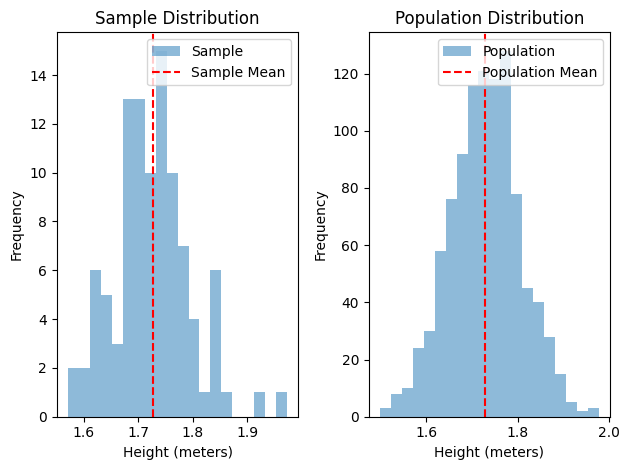

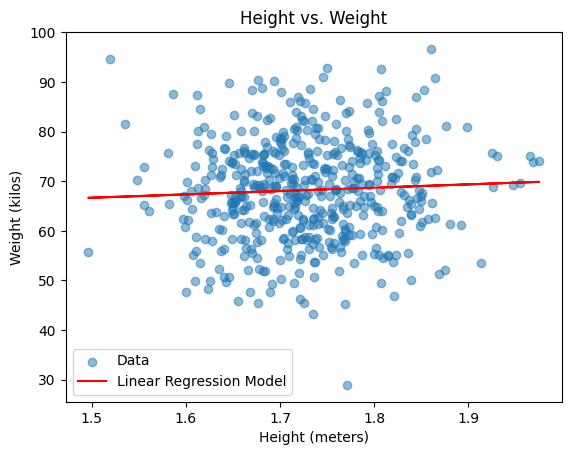

Population mean height: 1.7296845052206824
Sample mean height: 1.7261593563226598
Sample standard deviation: 0.0696026244917723
95% confidence interval for population mean height: (1.71047935632266, 1.7418393563226597)
Correlation between height and weight: 0.05117432260835019


In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate a population of 1000 random heights (in meters) with mean 1.73 and standard deviation 0.08
population = np.random.normal(1.73, 0.08, 1000)

# Take a sample of 100 heights from the population
sample = np.random.choice(population, 100)

# Calculate the mean and standard deviation of the sample
sample_mean = np.mean(sample)
sample_std_dev = np.std(sample)

# Calculate a 95% confidence interval for the population mean based on the sample
z_critical = 1.96 # for a 95% confidence interval
margin_of_error = z_critical * (0.08 / np.sqrt(100))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Generate a random dataset of 500 people with height and weight columns
data = pd.DataFrame({
    "Height": np.random.normal(1.73, 0.08, 500),
    "Weight": np.random.normal(68, 10, 500)
})

# Calculate the correlation between height and weight in the dataset
correlation = data["Height"].corr(data["Weight"])

# Fit a linear regression model to predict weight based on height in the dataset
X = data["Height"].values.reshape(-1, 1)
y = data["Weight"].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
predicted_weights = regressor.predict(X)

# Plot the sample distribution
plt.subplot(1, 2, 1)
plt.hist(sample, bins=20, alpha=0.5, label="Sample")
plt.axvline(x=sample_mean, color="red", linestyle="--", label="Sample Mean")
plt.xlabel("Height (meters)")
plt.ylabel("Frequency")
plt.title("Sample Distribution")
plt.legend()

# Plot the population distribution
plt.subplot(1, 2, 2)
plt.hist(population, bins=20, alpha=0.5, label="Population")
plt.axvline(x=np.mean(population), color="red", linestyle="--", label="Population Mean")
plt.xlabel("Height (meters)")
plt.ylabel("Frequency")
plt.title("Population Distribution")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Plot the linear regression model
plt.scatter(data["Height"], data["Weight"], alpha=0.5, label="Data")
plt.plot(X, predicted_weights, color="red", label="Linear Regression Model")
plt.xlabel("Height (meters)")
plt.ylabel("Weight (kilos)")
plt.title("Height vs. Weight")
plt.legend()

# Show the plot
plt.show()

# Print the results
print("Population mean height:", np.mean(population))
print("Sample mean height:", sample_mean)
print("Sample standard deviation:", sample_std_dev)
print("95% confidence interval for population mean height:", confidence_interval)
print("Correlation between height and weight:", correlation)